In [10]:
#Setting up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
sns.set()

In [11]:
#GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
len(gpus)

0

In [12]:
#Dataset that should go with Alzheimer label
very_mild = glob(r'D:\GitHub\Alzheimer-Prediction\dataset\Very_Mild_Demented\*')
mild = glob(r'D:\GitHub\Alzheimer-Prediction\dataset\Mild_Demented\*')
moderate = glob(r'D:\GitHub\Alzheimer-Prediction\dataset\Moderate_Demented\*')

#Dataset without Alzheimer
non = glob(r'D:\GitHub\Alzheimer-Prediction\dataset\Non_Demented\*')

D:\GitHub\Alzheimer-Prediction\dataset\Non_Demented\non_10.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

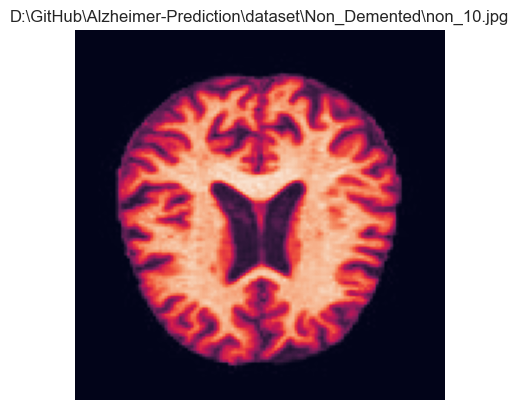

In [13]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

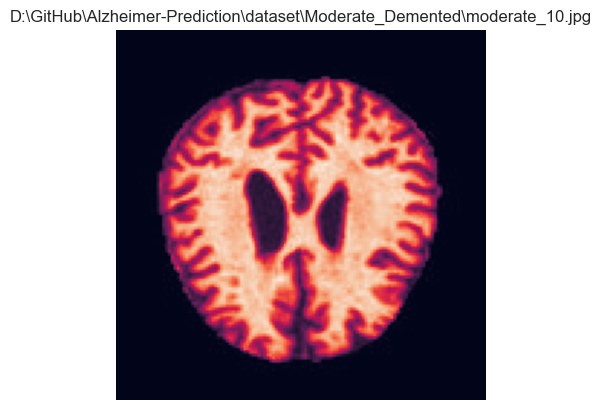

In [14]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

Number of components explaining 80% variance: 174
[[-13.67351952 -11.12698886   4.70181476 ...  -0.08656695   0.77388525
   -1.14968468]
 [ -7.86342644  -2.8494955  -14.15420898 ...   0.68037508  -0.6079441
   -1.01635249]
 [ 11.36592732  10.10502384  -7.5417105  ...  -0.35326784   1.01626725
   -0.12564677]
 ...
 [  2.07047026  15.24840242  -3.46057461 ...  -1.37132709  -0.83199533
    1.41031217]
 [-16.44196625   2.45975954  -0.99334194 ...  -0.51462619   2.35164109
   -0.62206968]
 [-20.0786049   -3.45295444  -1.98123428 ...   1.25247784  -0.27313779
   -0.93142872]]


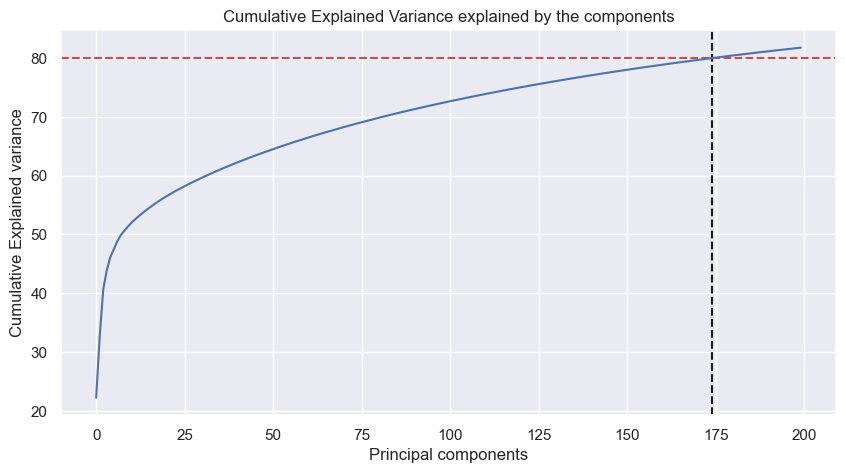

In [15]:
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img / 255.0  # normalize pixel values
    img = resize(img, (128, 128, 3))  # convert all images to (128x128x3)
    img = np.reshape(img, (128, 384))
    return img

non_ALZ = [extract_feature(filename) for filename in non]
vmild_ALZ = [extract_feature(filename) for filename in very_mild]
mild_ALZ = [extract_feature(filename) for filename in mild]
moderate_ALZ = [extract_feature(filename) for filename in moderate]
ALZ = vmild_ALZ + mild_ALZ + moderate_ALZ

#for PCA
all_data = np.concatenate((np.array(non_ALZ),np.array(ALZ)))
#print(all_data)
all_data = all_data.reshape(all_data.shape[0], np.product(all_data.shape[1:]))

scaler = StandardScaler()
scaler.fit(all_data)

#standardize data to 0 mean and unit variance
X = scaler.transform(all_data)

#split the data 
from sklearn.model_selection import train_test_split
y = [0] * len(non_ALZ) + [1] * len(ALZ)
X_train, X_test, y_train, y_test = train_test_split(all_data, y, test_size=0.2)

scala = preprocessing.StandardScaler()
#Compressing the images into two dimensions using PCA
pca = decomposition.PCA(200)
X_proj = pca.fit_transform(X_train)

#let's first see which principal component works better
#scree plot but cumulative
# Getting the cumulative variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100 #100 is multiplied for percentage
 
# How many PCs explain 90% of the variance?
k = np.argmax(var_cumu>80)
print("Number of components explaining 80% variance: "+ str(k)) #I guess, I will have to use 160 axis
#print("\n")
 
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=80, color="r", linestyle="--")
ax = plt.plot(var_cumu)

print(X_proj)